<a href="https://colab.research.google.com/github/MaGariass/HWTS/blob/main/VRHW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

In [4]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

Для стационарного ряда был выбран метод экспоненциального сглаживания, потому что он позволяет учитывать резкие колебания ряда лучше, чем скользящее среднее и взвешенное среднее.

In [5]:
time_series1 = pd.read_csv('daily-total-female-births-in-cal.csv')['Count']

In [6]:
train=time_series1[0:182]
test=time_series1[182:]

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


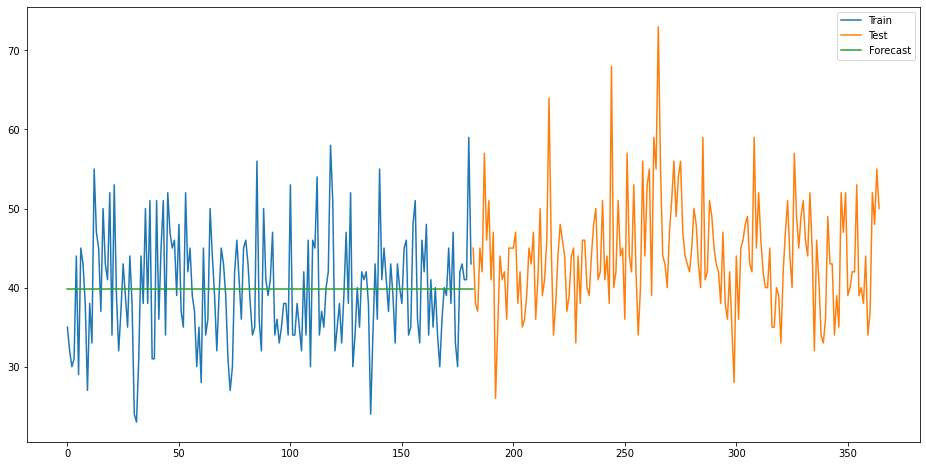

In [10]:
y_hat_avg = test.copy()
model = SimpleExpSmoothing(np.asarray(train)).fit(optimized=True)
y_hat_avg['SES'] = model.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_avg['SES'], label='Forecast')
plt.legend(loc='best')
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [12]:
rms = sqrt(mean_squared_error(test, y_hat_avg.SES))
print(rms)

8.262156488950643


Ошибка маленькая. Качество предсказания неплохое.

Второй ряд возьмем не стационарный - средняя температура воздуха по месяцам. Так как у данного временного ряда есть сезонность, то для него лучше всего подойдет модель Хольт-Винтерса, потому что она как раз ее учитывает.

In [13]:
from statsmodels.tsa.api import ExponentialSmoothing

In [14]:
time_series2 = pd.read_csv('mean-monthly-air-temperature-deg.csv')['Deg']

In [15]:
train2=time_series2[0:120]
test2=time_series2[120:]

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


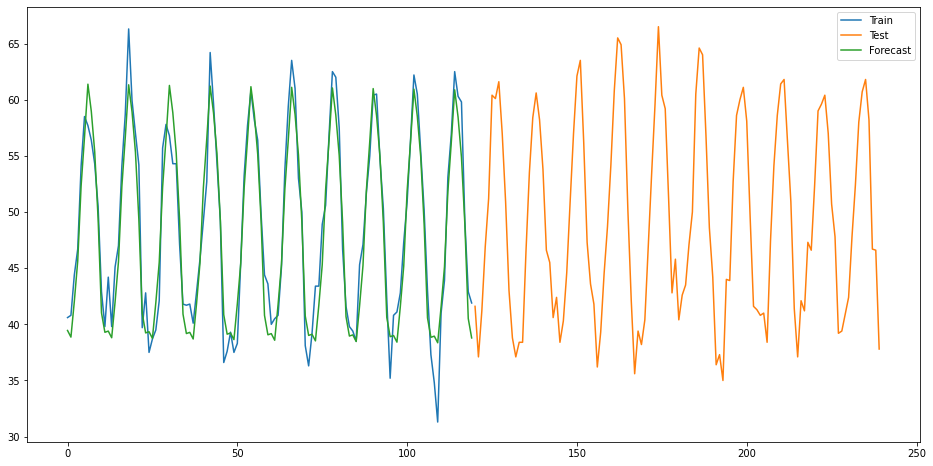

In [18]:
y_hat_avg2 = test2.copy()
model2=ExponentialSmoothing(np.asarray(train2), seasonal_periods = 12, trend='add', seasonal='add',).fit()
y_hat_avg2['Holt_Winter'] = model2.forecast(len(test2))
plt.figure(figsize=(16,8))
plt.plot(train2, label='Train')
plt.plot(test2, label='Test')
plt.plot(y_hat_avg2['Holt_Winter'], label='Forecast')
plt.legend(loc='best')
plt.show()

In [19]:
rms2 = sqrt(mean_squared_error(test2, y_hat_avg2.Holt_Winter))
print(rms2)

2.644455509077325


Ошибка маленькая. Качество предсказания неплохое.